Given a sinusoidal waveform of 100 Hz,

$x(t) = 4.5sin(2 \pi 100t)$

sample it at 8,000 samples per second and,

a. write a program to quantize $x(t)$ using a 6-bit bipolar quantizer to obtain the
quantized signal $x_q$, assuming that the signal range is from -5 to 5 volts;

b. plot the original signal and quantized signal;

c. calculate the SNR due to quantization using the program.

In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# Parameters
f = 100
fs = 8000
Ts = 1/fs
t_start = 0
t_end = 0.02
t = np.arange(t_start, t_end, Ts)

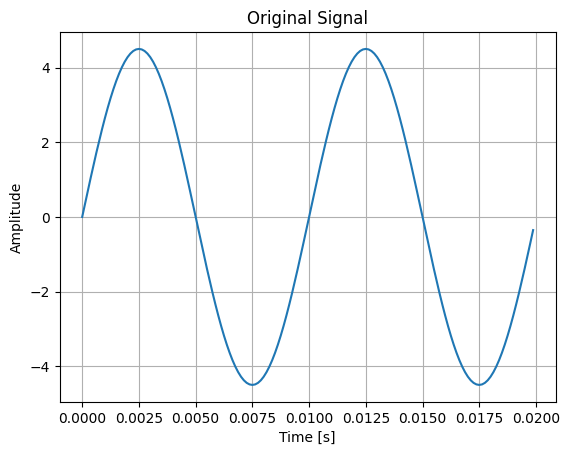

In [39]:
# Signal
A = 4.5  # amplitude
x = A * np.sin(2 * np.pi * f * t)
plt.plot(t, x)
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [40]:
# a

min_val = -5
max_val = 5
length = max_val - min_val

n_bits = 6
q_levels = 2 ** n_bits
step_size = length / q_levels

q_index = np.floor((x - np.min(x)) / step_size)

clipped_index = np.clip(q_index, 0, q_levels - 1)

q_value =  np.min(x) + ((clipped_index + 0.5) * step_size)

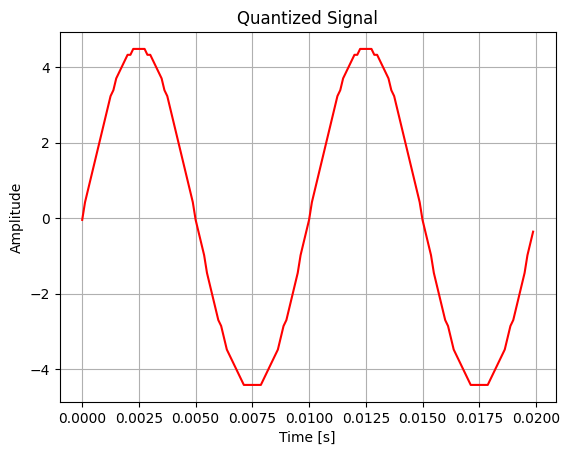

In [41]:
# b.

plt.plot(t, q_value, 'r')
#plt.plot(t, x)
plt.title('Quantized Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [42]:
# c.

# Quantization Error
q_err = x - q_value

p_qerr = (step_size**2) / 12    # Power of quantization error
p_signal = np.mean(x**2)        # Power of signal
  
SNR = (p_signal) / (p_qerr)
print(SNR)

4976.639999999999


Higher bits → more levels → smaller step size → closer approximation to the signal

SNR - Signal to Noise ratio. 
Quantization error is not noise. SNR is simply the right tool to measure how the error affects the signal.